<a href="https://www.kaggle.com/code/sahilr05/data-scientist-salary?scriptVersionId=106639772" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ARDRegression,LogisticRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [2]:
data = pd.read_csv("/kaggle/input/data-science-job-salaries/ds_salaries.csv")
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
# Remove unwanted columns 
# we consider salary in used so remove salary & salary_currency

data.drop(["Unnamed: 0","salary_currency", "salary"],inplace=True,axis=1)

In [6]:
for i in data.columns:
    if data[i].dtype=="O":
        print("============================================")
        print(i)
        print(data[i].value_counts())
        print("============================================")

experience_level
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
employment_type
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                     

In [7]:
for i in data.columns:
    if data[i].dtype!="O":
        print("============================================")
        print(i)
        print(data[i].value_counts())
        print("============================================")

work_year
2022    318
2021    217
2020     72
Name: work_year, dtype: int64
salary_in_usd
100000    15
120000    12
150000    12
200000    10
135000     9
          ..
74000      1
61896      1
26005      1
22611      1
129000     1
Name: salary_in_usd, Length: 369, dtype: int64
remote_ratio
100    381
0      127
50      99
Name: remote_ratio, dtype: int64


**EDA**

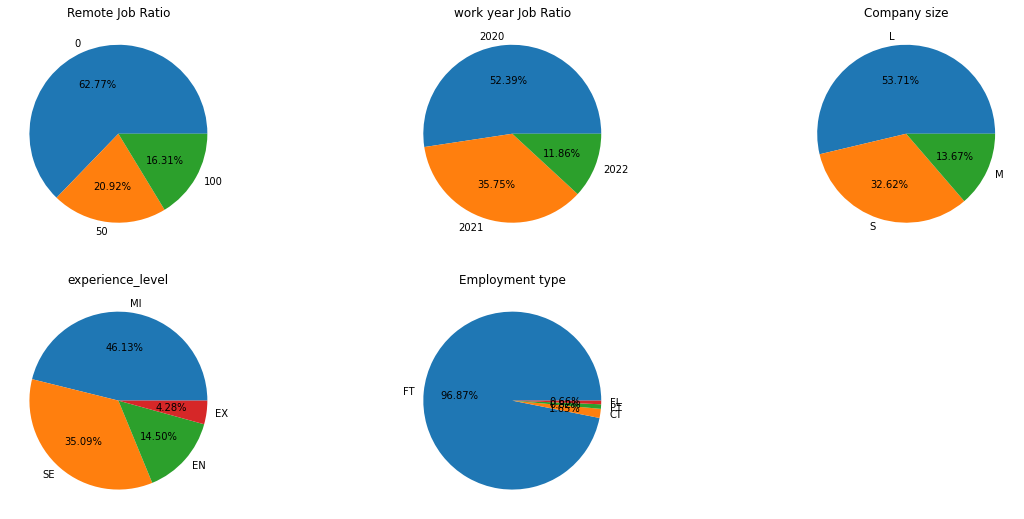

In [8]:
# Ordinal  Data Analysis
plt.figure(figsize=(20,9))

plt.subplot(2,3,1)
plt.pie(data["remote_ratio"].value_counts(),autopct="%0.2f%%",labels=data["remote_ratio"].unique())
plt.title("Remote Job Ratio")

plt.subplot(2,3,2)
plt.pie(data["work_year"].value_counts(),autopct="%0.2f%%",labels=data["work_year"].unique())
plt.title("work year Job Ratio")

plt.subplot(2,3,3)
plt.pie(data["company_size"].value_counts(),autopct="%0.2f%%",labels=data["company_size"].unique())
plt.title("Company size")

plt.subplot(2,3,4)
plt.pie(data["experience_level"].value_counts(),autopct="%0.2f%%",labels=data["experience_level"].unique())
plt.title("experience_level")

plt.subplot(2,3,5)
plt.pie(data["employment_type"].value_counts(),autopct="%0.2f%%",labels=data["employment_type"].unique())
plt.title("Employment type")

plt.show()

Text(0.5, 1.0, 'Remote work vs Salary')

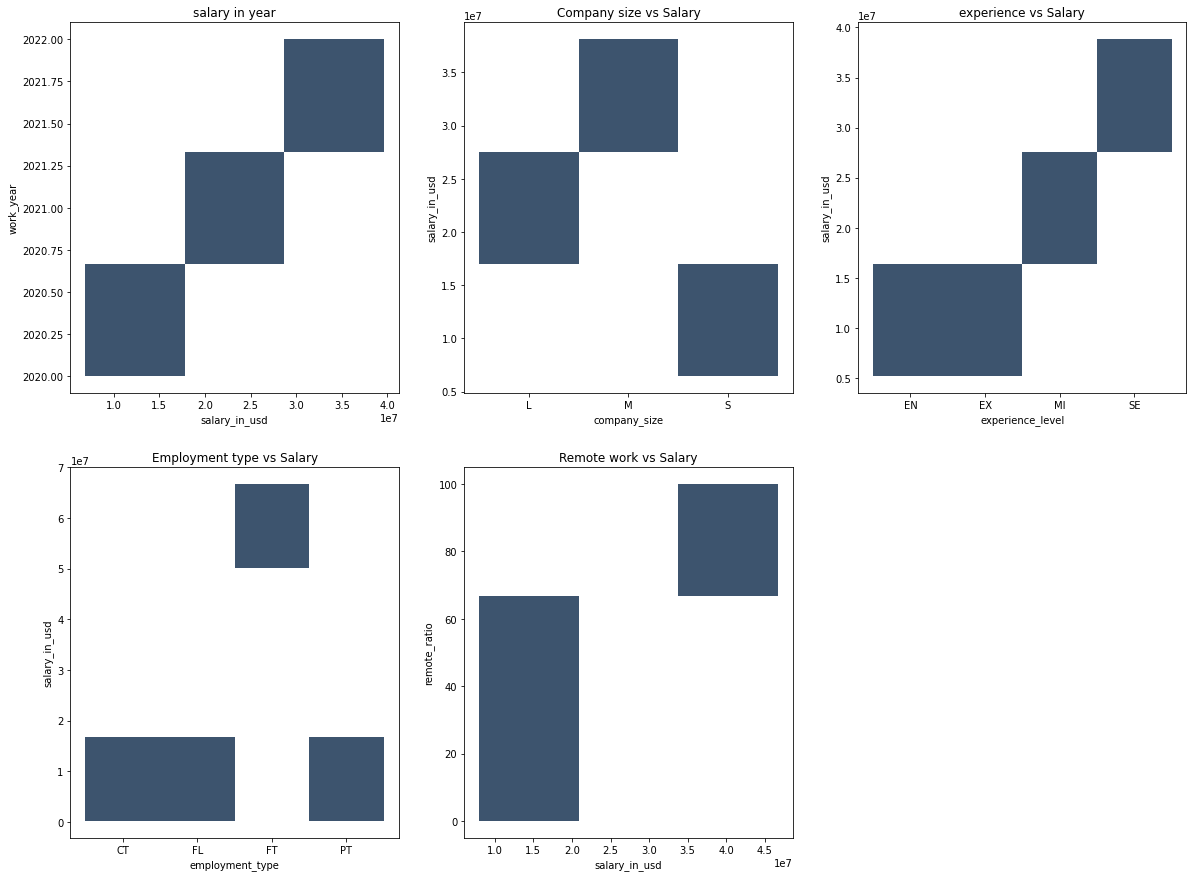

In [9]:
a = pd.DataFrame(data.groupby("work_year")["salary_in_usd"].sum().reset_index())
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.histplot(y=a["work_year"], x= a["salary_in_usd"])
plt.title("salary in year")

b = pd.DataFrame(data.groupby("company_size")["salary_in_usd"].sum().reset_index())
plt.subplot(2,3,2)
sns.histplot( x = b["company_size"], y = b["salary_in_usd"])
plt.title("Company size vs Salary")

c = pd.DataFrame(data.groupby("experience_level")["salary_in_usd"].sum().reset_index())
plt.subplot(2,3,3)
sns.histplot( x = c["experience_level"], y = c["salary_in_usd"])
plt.title("experience vs Salary")

d = pd.DataFrame(data.groupby("employment_type")["salary_in_usd"].sum().reset_index())
plt.subplot(2,3,4)
sns.histplot( x = d["employment_type"], y = d["salary_in_usd"])
plt.title("Employment type vs Salary")

d = pd.DataFrame(data.groupby("remote_ratio")["salary_in_usd"].sum().reset_index())
plt.subplot(2,3,5)
sns.histplot( y = d["remote_ratio"], x = d["salary_in_usd"])
plt.title("Remote work vs Salary")

* **salary increase in every year**
* **medium size company give more salary compared to Large company**
* **simply relation more experience get more salary**
* **Full Time employ get high salary**
* **Fully remote workers getting more salary**

In [10]:
data.sample(1)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
83,2021,MI,FT,Machine Learning Engineer,47282,ES,100,ES,S


In [11]:
ordinal_data = ["employment_type","experience_level","company_size","work_year","remote_ratio"]
dummies = pd.get_dummies(data[ordinal_data],drop_first=True)

In [12]:
data2 = pd.concat([data.drop(ordinal_data,axis=1),dummies],axis=1)

In [13]:
data2.head(2)

,job_title,salary_in_usd,employee_residence,company_location,work_year,remote_ratio,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EX,experience_level_MI,experience_level_SE,company_size_M,company_size_S
0,Data Scientist,79833,DE,DE,2020,0,0,1,0,0,1,0,0,0
1,Machine Learning Scientist,260000,JP,JP,2020,0,0,1,0,0,0,1,0,1


In [14]:
encode = LabelEncoder()
data2["job_title"] = encode.fit_transform(data2["job_title"])
data2["company_location"] = encode.fit_transform(data2["company_location"])

In [15]:
data2.drop(["employee_residence"],axis=1,inplace=True)
data2["work_year"] = data2["work_year"].map({2020:1,2021:2,2022:3})
data2.head(2)

,job_title,salary_in_usd,company_location,work_year,remote_ratio,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EX,experience_level_MI,experience_level_SE,company_size_M,company_size_S
0,22,79833,12,1,0,0,1,0,0,1,0,0,0
1,41,260000,29,1,0,0,1,0,0,0,1,0,1


In [16]:
x = data2.drop(["salary_in_usd"],axis=1)
y = data2["salary_in_usd"]

In [17]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [18]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((424, 12), (183, 12), (424,), (183,))

In [19]:
# Liner Model
lr = LinearRegression()
lasso =Lasso()
ridge = Ridge()
ad = ARDRegression()
log = LogisticRegression()
sdg = SGDRegressor()

# ensemble Model
rd = RandomForestRegressor()
adb = AdaBoostRegressor()
gbr = GradientBoostingRegressor()

linear_models = [lr,lasso,ridge,ad,sdg]
ensemble_model = [rd,adb,gbr]

In [20]:
def run_model(model):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    print("r2 score ",r2_score(y_test,ypred))
    print("MAE", mean_absolute_error(y_test,ypred))
    print("MSE", mean_squared_error(y_test,ypred))

In [21]:
for i in linear_models:
    print("==================")
    print(i)
    run_model(i)
    print("==================")

LinearRegression()
r2 score  0.27418465906758105
MAE 46501.54826157068
MSE 5209321524.962088
Lasso()
r2 score  0.27416742649666026
MAE 46501.85473646867
MSE 5209445206.562028
Ridge()
r2 score  0.27046815733864427
MAE 46521.22093350375
MSE 5235995599.430172
ARDRegression()
r2 score  0.18530658465250482
MAE 48216.8636205218
MSE 5847217199.022728
SGDRegressor()
r2 score  -1326488825884701.8
MAE 2837792838609.803
MSE 9.520474979801057e+24


In [22]:
for i in ensemble_model:
    print("==================")
    print(i)
    run_model(i)
    print("==================")

RandomForestRegressor()
r2 score  0.3744331741763879
MAE 41388.90609003556
MSE 4489817929.280415
AdaBoostRegressor()
r2 score  0.3102485803319459
MAE 43455.88766792893
MSE 4950483566.156136
GradientBoostingRegressor()
r2 score  0.37910281469430307
MAE 40363.209906888085
MSE 4456302987.542533


In [23]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
cv = ShuffleSplit(n_splits=3,test_size=0.2,random_state=10)
for i in ensemble_model:
    print(i)
    print(cross_val_score(i,x,y,cv=cv))
    print("==========================")

RandomForestRegressor()
[0.3419583  0.30060365 0.31857138]
AdaBoostRegressor()
[0.29328405 0.06351996 0.25094431]
GradientBoostingRegressor()
[0.35537658 0.4527045  0.37483692]


In [24]:
%%time
rd = RandomForestRegressor()
parm = {
    "n_estimators" : [10,100,200,300],
    "criterion" : ['squared_error', 'absolute_error', 'poisson'],
    "max_depth" : [100,50,20,10,None],
#     "min_samples_split":[2,3,4],
    "min_samples_leaf" : [1,2,3],
#     "min_weight_fraction_leaf" : [10.0,20.0,0.0],
    "max_features" : ["auto",'sqrt', 'log2'],
#     "max_leaf_nodes":[50,40,None],
#     "min_impurity_decrease":[10.0,5.0,2.0,1.0,0.0],
#     "n_jobs" : [-1],
#      "verbose": [0],
#     "warm_start": [False,True],
#     "ccp_alpha" : [0.0],
#     "max_samples" :[None,0.0,1.0]   
}

grid = RandomizedSearchCV(rd,parm,cv=5,n_jobs=-1,n_iter=200,)

grid.fit(x_train,y_train)
ypred = grid.predict(x_test)

CPU times: user 4.2 s, sys: 134 ms, total: 4.33 s
Wall time: 3min 42s


In [25]:
# print(cross_val_score(grid,x,y,cv=cv))
# print("r2 score ",r2_score(y_test,ypred))
# print("MAE", mean_absolute_error(y_test,ypred))
# print("MSE", mean_squared_error(y_test,ypred))